In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data loading and cleaning

In [2]:
df = pd.read_csv('Clones.csv')
df.shape

(121, 24)

In [3]:
df = pd.DataFrame(df[:118])
df.shape

(118, 24)

In [4]:
df.columns

Index(['Unnamed: 0', 'Life form', 'Life form.1', 'Root budding', 'Rhizome',
       'Axial splitting', 'Creeping', 'Stolon', 'Bulb/corm', 'Stem budding',
       'Multiple CGO', 'Disturbance related', 'Psuedo annual',
       'Connection >2 years', 'Connection<2 years', 'Spread >0.5M',
       'Spread<0.5M', 'Multiplication frequent', 'Multiplication infrequent',
       'Genet >5 ramets', 'Genet <=5 ramets', 'CGO water storage',
       'Descendents smaller', 'Descendents same size'],
      dtype='object')

In [5]:
df.rename(columns = {'Unnamed: 0' : 'plant'}, inplace = True)

In [6]:
for i in df.columns[3:]:
    df[i] = df[i].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   plant                      118 non-null    object 
 1   Life form                  118 non-null    float64
 2   Life form.1                118 non-null    object 
 3   Root budding               118 non-null    int64  
 4   Rhizome                    118 non-null    int64  
 5   Axial splitting            118 non-null    int64  
 6   Creeping                   118 non-null    int64  
 7   Stolon                     118 non-null    int64  
 8   Bulb/corm                  118 non-null    int64  
 9   Stem budding               118 non-null    int64  
 10  Multiple CGO               118 non-null    int64  
 11  Disturbance related        118 non-null    int64  
 12  Psuedo annual              118 non-null    int64  
 13  Connection >2 years        118 non-null    int64  

In [8]:
for i in df.columns:
    print(df[i].value_counts())
    print()

plant
Acacia constricta          1
Acacia greggii             1
Parkinsonia microphylla    1
Prosopis velutina          1
Prosopis glandulosa        1
                          ..
Grusonia parishii          1
Mammillaria thornberi      1
Opuntia basilaris          1
Opuntia engelmannii        1
Opuntia phaeacantha        1
Name: count, Length: 118, dtype: int64

Life form
5.0    36
2.0    35
4.0    15
3.0    15
6.0    12
1.0     5
Name: count, dtype: int64

Life form.1
grass         36
shrub         35
herbaceous    15
subshrub      15
succulent     12
tree           5
Name: count, dtype: int64

Root budding
0    66
1    52
Name: count, dtype: int64

Rhizome
0    74
1    44
Name: count, dtype: int64

Axial splitting
0    83
1    35
Name: count, dtype: int64

Creeping
0    104
1     14
Name: count, dtype: int64

Stolon
0    112
1      6
Name: count, dtype: int64

Bulb/corm
0    113
1      5
Name: count, dtype: int64

Stem budding
0    115
1      3
Name: count, dtype: int64

Multiple CGO

In [9]:
df.head()

,plant,Life form,Life form.1,Root budding,Rhizome,Axial splitting,Creeping,Stolon,Bulb/corm,Stem budding,...,Connection<2 years,Spread >0.5M,Spread<0.5M,Multiplication frequent,Multiplication infrequent,Genet >5 ramets,Genet <=5 ramets,CGO water storage,Descendents smaller,Descendents same size
0,Acacia constricta,1.0,tree,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1,Acacia greggii,1.0,tree,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,Parkinsonia microphylla,1.0,tree,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
3,Prosopis velutina,1.0,tree,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,Prosopis glandulosa,1.0,tree,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [10]:
df['Life form.1'].value_counts()

Life form.1
grass         36
shrub         35
herbaceous    15
subshrub      15
succulent     12
tree           5
Name: count, dtype: int64

# All clonal plants

In [11]:
all_clones = pd.DataFrame((df.sum(numeric_only=True) / len(df) * 100)[1:])
all_clones.sort_values(0, ascending=False, inplace = True)

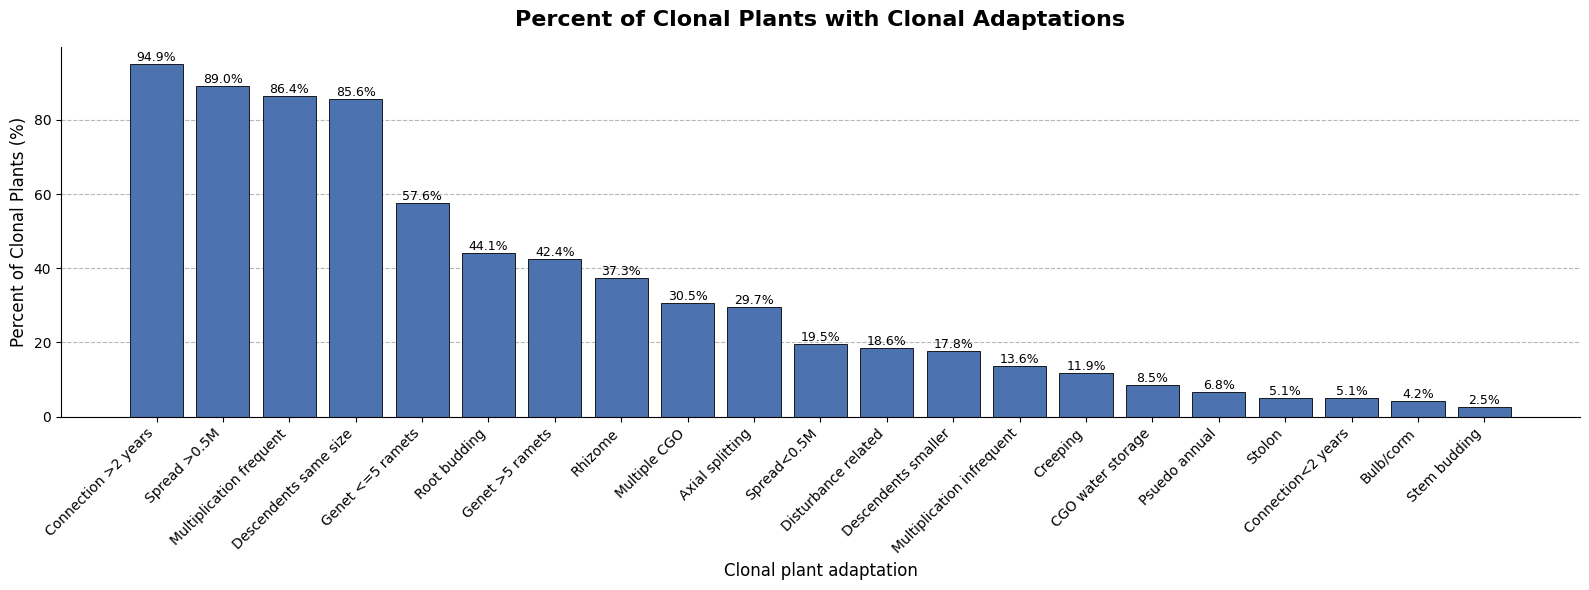

In [12]:
fig, ax = plt.subplots(figsize=(16, 6))

bars = ax.bar(
    all_clones.index,
    all_clones[0].values,
    color="#4C72B0",   # muted blue
    edgecolor="black",
    linewidth=0.6
)

# Grid: light and only on y-axis
ax.grid(axis="y", linestyle="--", alpha=0.9)
ax.set_axisbelow(True)

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Labels and title
ax.set_title(
    "Percent of Clonal Plants with Clonal Adaptations",
    fontsize=16,
    weight="bold",
    pad=15
)
ax.set_ylabel("Percent of Clonal Plants (%)", fontsize=12)
ax.set_xlabel("Clonal plant adaptation", fontsize=12)

# Rotate x labels and improve readability
plt.xticks(rotation=45, ha="right", fontsize=10)

# Optional: add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.show()

# Individual plant lifeforms

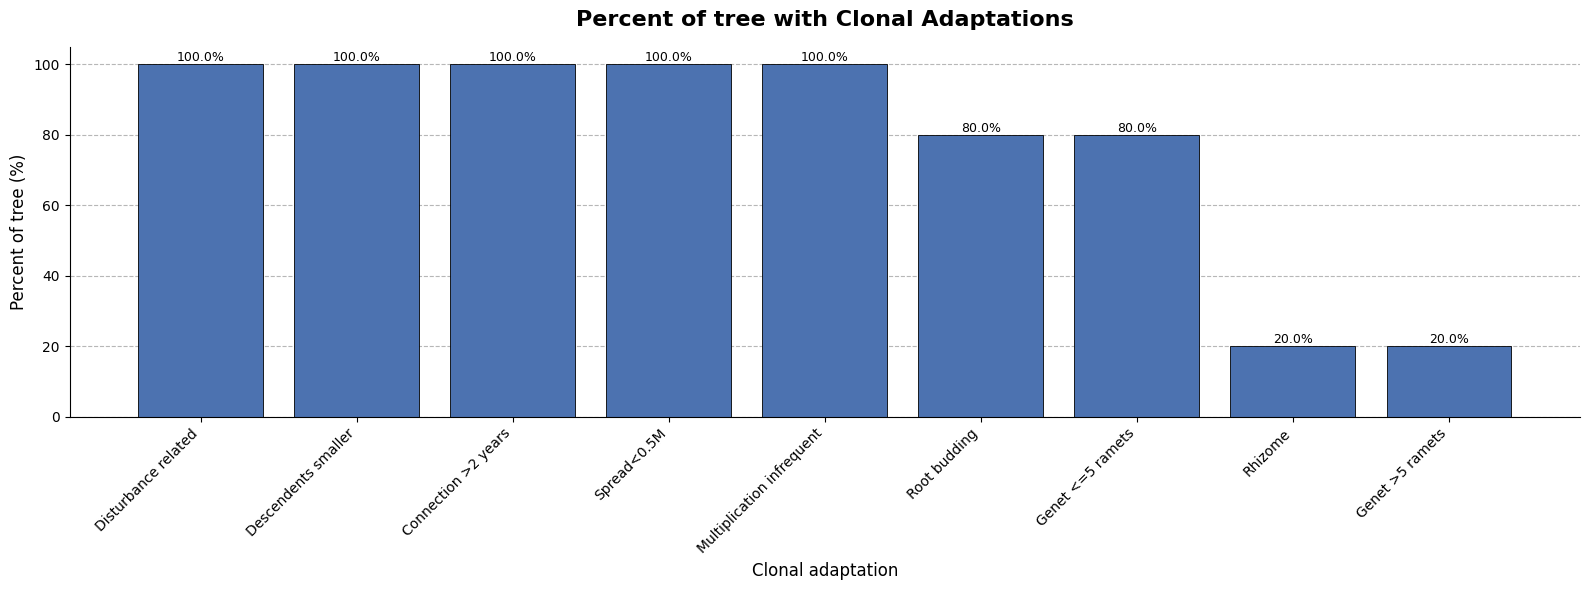

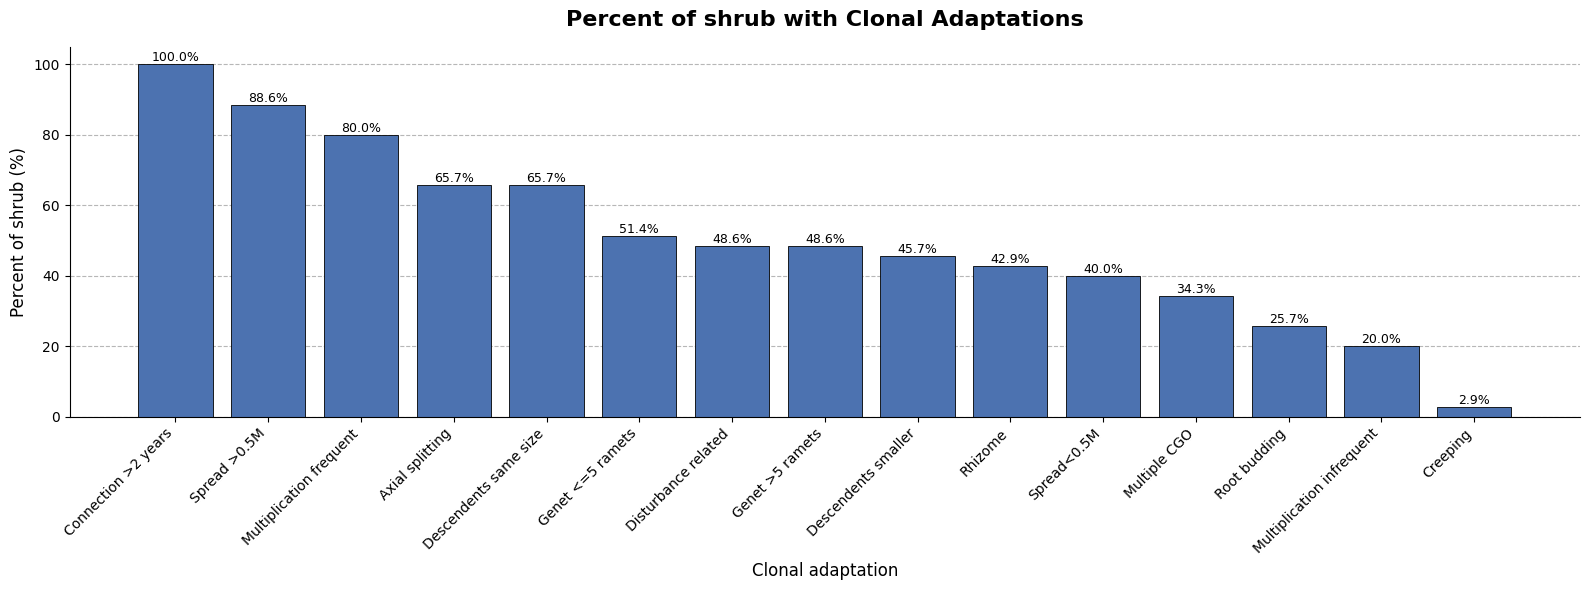

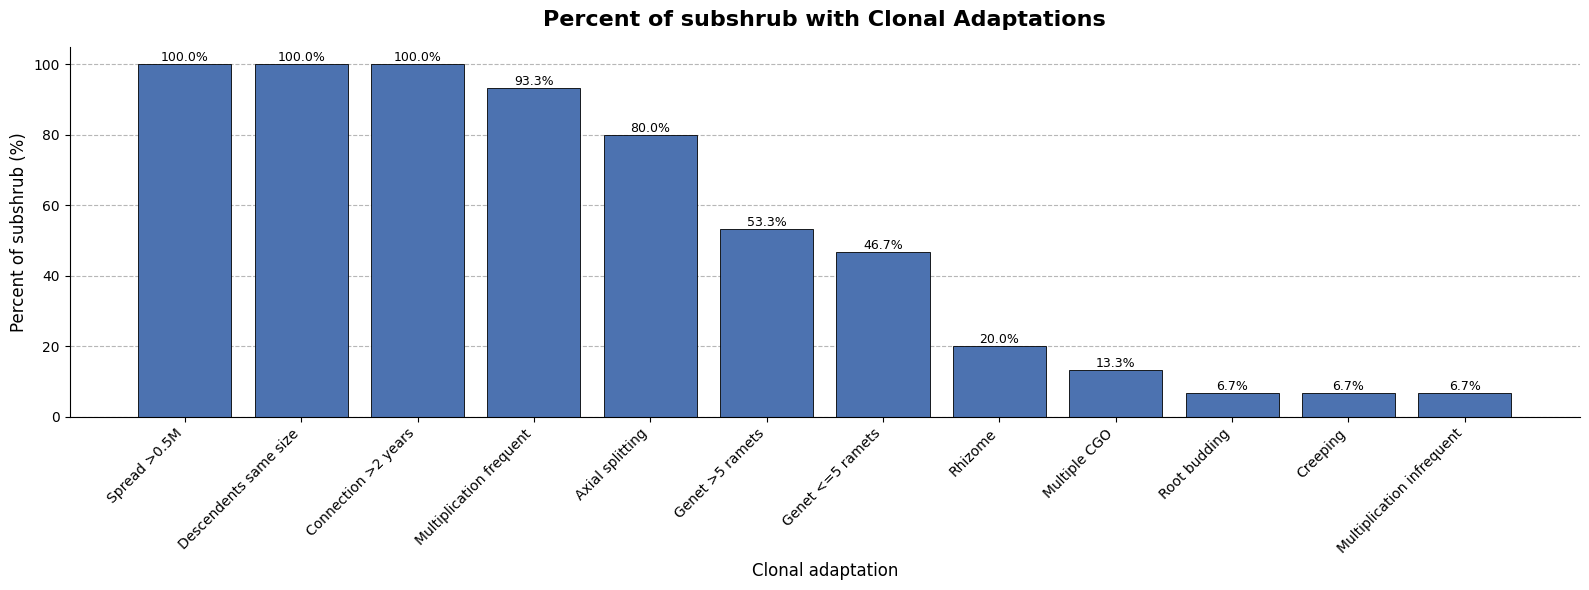

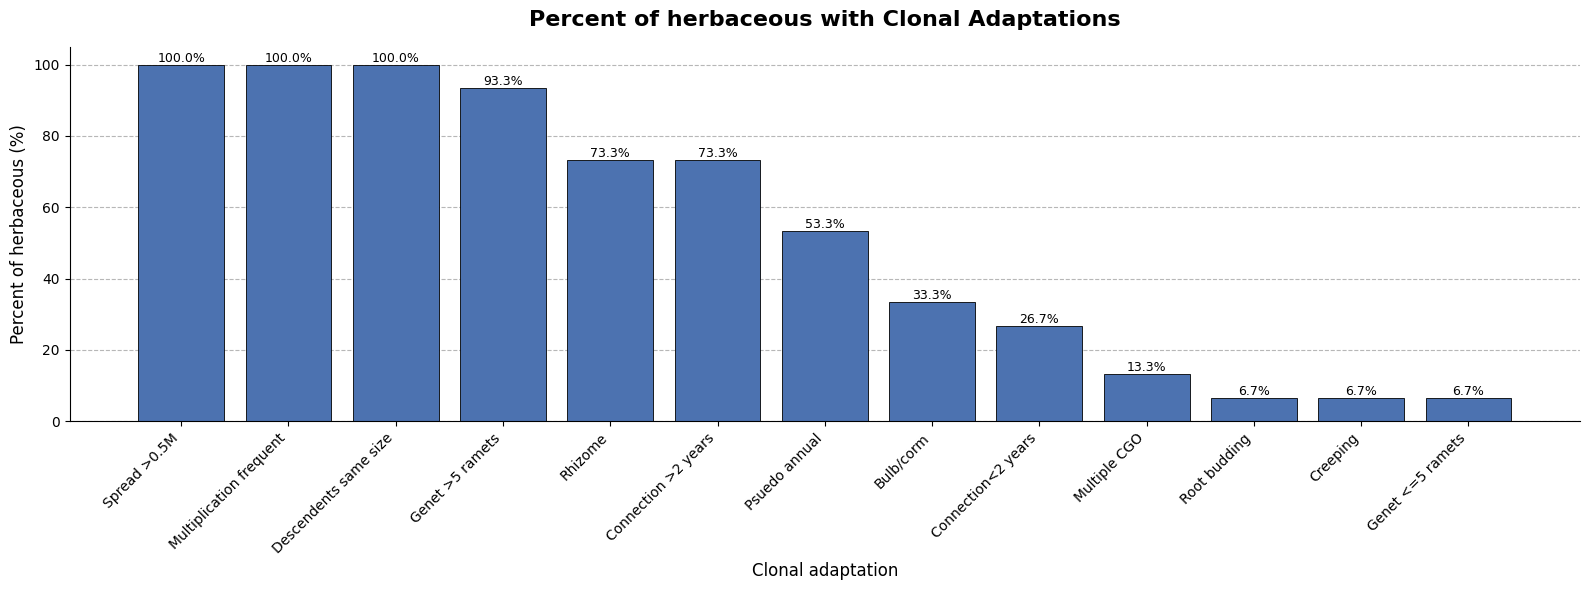

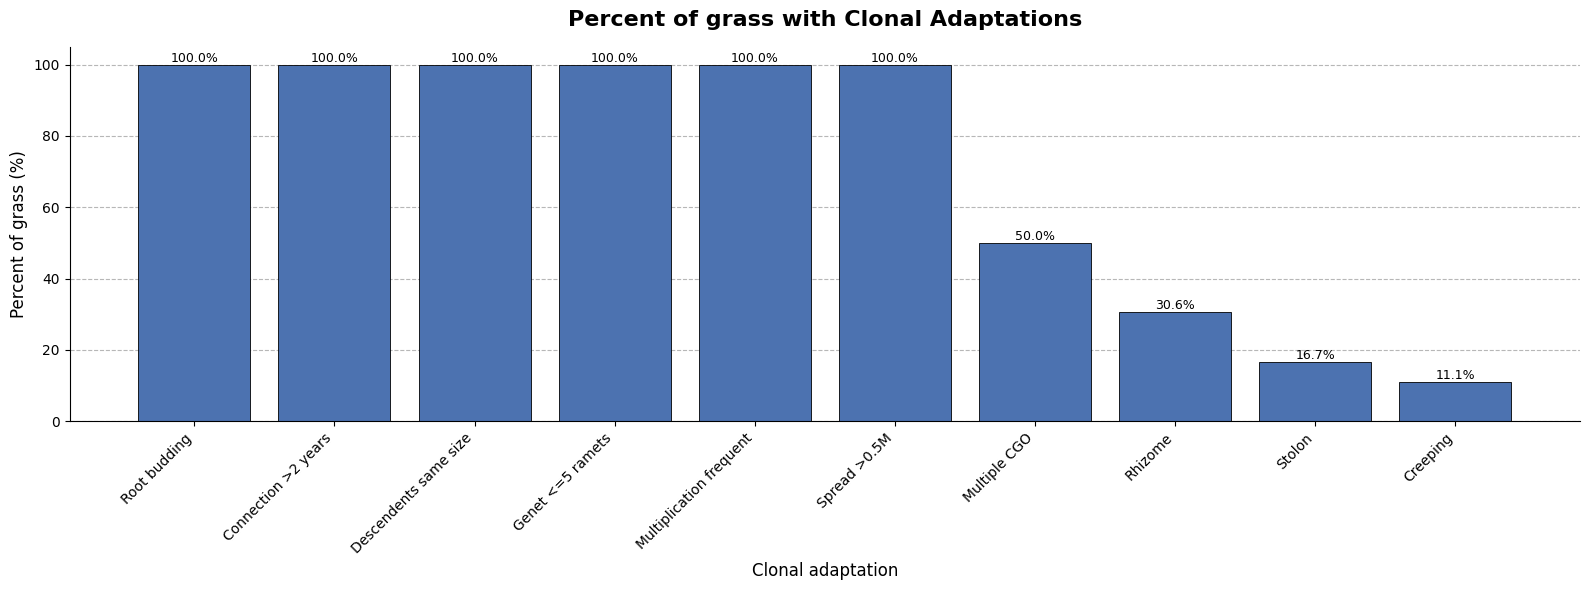

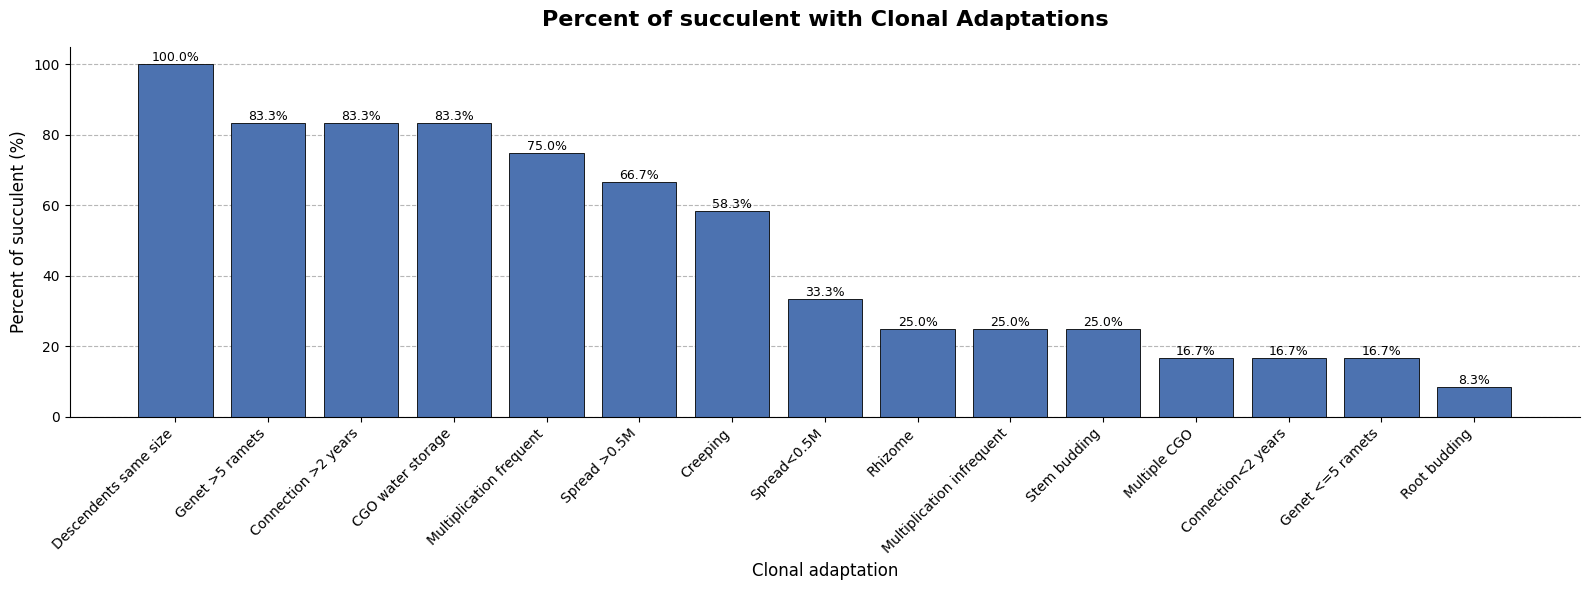

In [14]:
for life_form in df['Life form.1'].unique():

    # Compute % occurrence
    subset = df[df['Life form.1'] == life_form]
    ind = (subset.sum(numeric_only=True) / len(subset)) * 100
    ind = ind.iloc[1:]                     # drop non-adaptation column
    ind = ind[ind != 0]                    # remove zero values
    ind = ind.sort_values(ascending=False)

    if ind.empty:
        continue

    fig, ax = plt.subplots(figsize=(16, 6))

    bars = ax.bar(
        ind.index,
        ind.values,
        color="#4C72B0",
        edgecolor="black",
        linewidth=0.6
    )

    # Grid: y-axis only
    ax.grid(axis="y", linestyle="--", alpha=0.9)
    ax.set_axisbelow(True)

    # Clean spines
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # Titles and labels
    ax.set_title(
        f"Percent of {life_form} with Clonal Adaptations",
        fontsize=16,
        weight="bold",
        pad=15
    )
    ax.set_ylabel(f"Percent of {life_form} (%)", fontsize=12)
    ax.set_xlabel("Clonal adaptation", fontsize=12)

    # X tick formatting
    ax.tick_params(axis="x", labelsize=10)

    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
    ax.tick_params(axis="y", labelsize=10)

    # Optional value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f"{height:.1f}%",
            ha="center",
            va="bottom",
            fontsize=9
        )

    plt.tight_layout()
    plt.show()

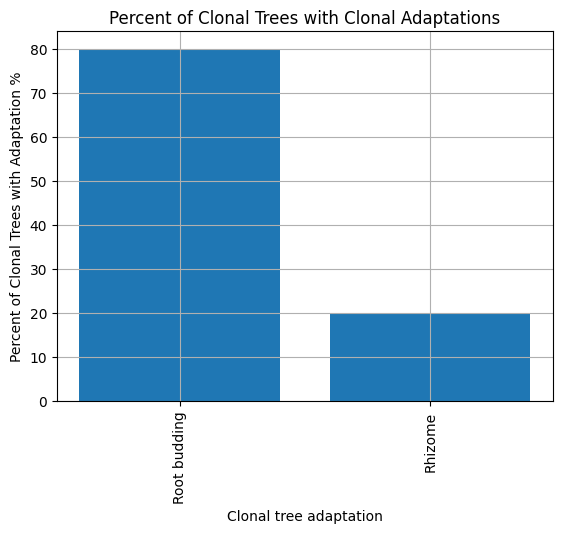

In [15]:
tree_data = df[df['Life form.1'] == 'tree'][['Root budding', 'Rhizome']].sum() / len(df[df['Life form.1'] == 'tree']) * 100

plt.bar(tree_data.index, tree_data.values)
plt.grid()
plt.xticks(rotation=90)
plt.title('Percent of Clonal Trees with Clonal Adaptations')
plt.ylabel('Percent of Clonal Trees with Adaptation %')
plt.xlabel('Clonal tree adaptation')
plt.show()

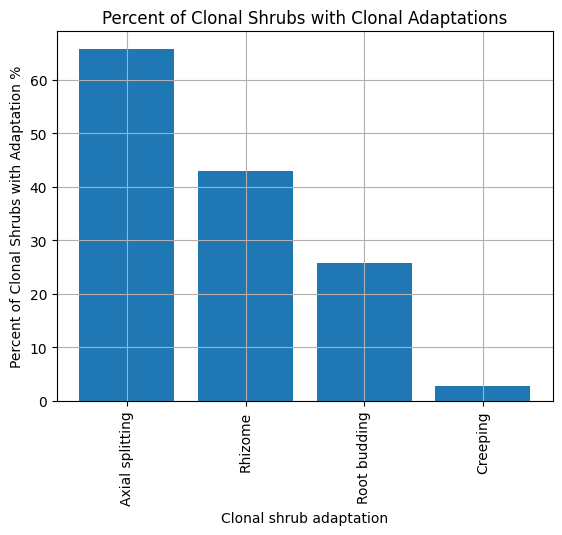

In [16]:
shrub_data = df[df['Life form.1'] == 'shrub'][['Axial splitting', 'Rhizome', 'Root budding', 'Creeping']].sum() / len(df[df['Life form.1'] == 'shrub']) * 100

plt.bar(shrub_data.index, shrub_data.values)
plt.grid()
plt.xticks(rotation=90)
plt.title('Percent of Clonal Shrubs with Clonal Adaptations')
plt.ylabel('Percent of Clonal Shrubs with Adaptation %')
plt.xlabel('Clonal shrub adaptation')
plt.show()

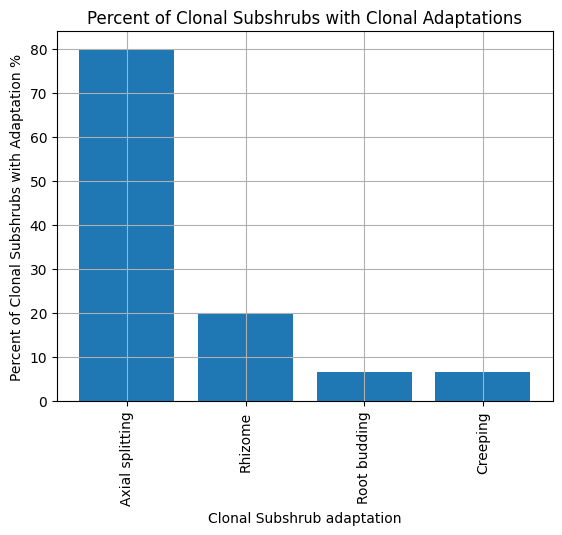

In [17]:
subshrub_data = df[df['Life form.1'] == 'subshrub'][['Axial splitting', 'Rhizome', 'Root budding', 'Creeping']].sum() / len(df[df['Life form.1'] == 'subshrub']) * 100

plt.bar(subshrub_data.index, subshrub_data.values)
plt.grid()
plt.xticks(rotation=90)
plt.title('Percent of Clonal Subshrubs with Clonal Adaptations')
plt.ylabel('Percent of Clonal Subshrubs with Adaptation %')
plt.xlabel('Clonal Subshrub adaptation')
plt.show()

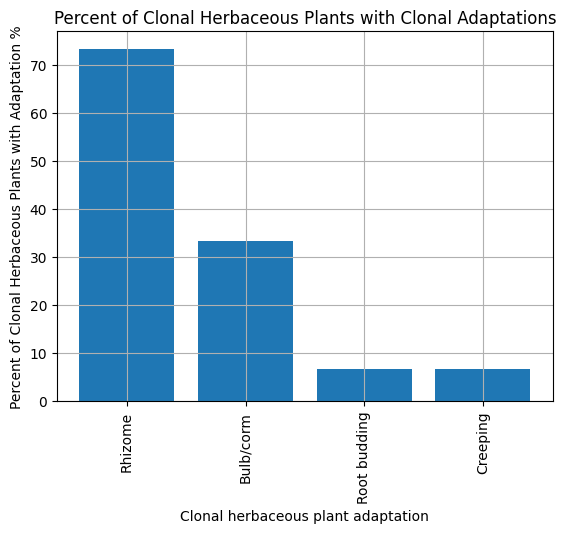

In [18]:
herb_data = df[df['Life form.1'] == 'herbaceous'][['Rhizome', 'Bulb/corm', 'Root budding', 'Creeping']].sum() / len(df[df['Life form.1'] == 'herbaceous']) * 100

plt.bar(herb_data.index, herb_data.values)
plt.grid()
plt.xticks(rotation=90)
plt.title('Percent of Clonal Herbaceous Plants with Clonal Adaptations')
plt.ylabel('Percent of Clonal Herbaceous Plants with Adaptation %')
plt.xlabel('Clonal herbaceous plant adaptation')
plt.show()

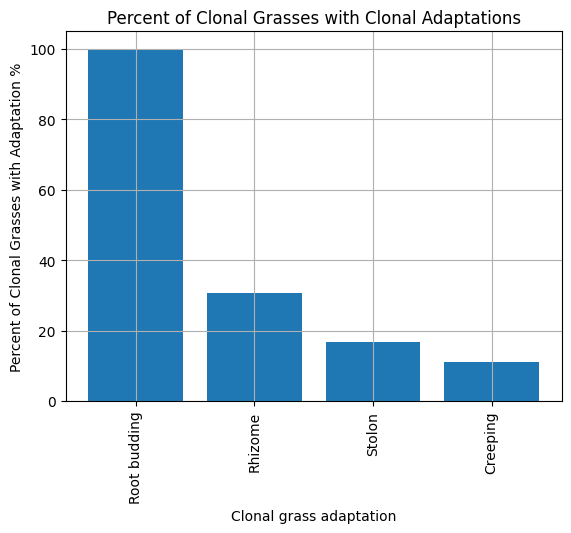

In [19]:
grass_data = df[df['Life form.1'] == 'grass'][['Root budding', 'Rhizome', 'Stolon', 'Creeping']].sum() / len(df[df['Life form.1'] == 'grass']) * 100

plt.bar(grass_data.index, grass_data.values)
plt.grid()
plt.xticks(rotation=90)
plt.title('Percent of Clonal Grasses with Clonal Adaptations')
plt.ylabel('Percent of Clonal Grasses with Adaptation %')
plt.xlabel('Clonal grass adaptation')
plt.show()